Processing 18 files from individual paths...
Processed: elsevier_ttls_results.json -> phase1/experiment1/run1: 5 passed
Processed: elsevier_ttls_results.json -> phase1/experiment1/run2: 3 passed
Processed: elsevier_ttls_results.json -> phase1/experiment1/run3: 3 passed
Processed: elsevier_ttls_results.json -> phase1/experiment2/run1: 3 passed
Processed: elsevier_ttls_results.json -> phase1/experiment2/run2: 3 passed
Processed: elsevier_ttls_results.json -> phase1/experiment2/run3: 3 passed
Processed: elsevier_ttls_results.json -> phase1/experiment3/run1: 4 passed
Processed: elsevier_ttls_results.json -> phase1/experiment3/run2: 3 passed
Processed: elsevier_ttls_results.json -> phase1/experiment3/run3: 4 passed
Processed: elsevier_ttls_results.json -> phase2/experiment1/run1: 13 passed
Processed: elsevier_ttls_results.json -> phase2/experiment1/run2: 12 passed
Processed: elsevier_ttls_results.json -> phase2/experiment1/run3: 12 passed
Processed: elsevier_ttls_results.json -> phase2/expe

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2336\3853877260.py:202: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax3.boxplot(box_data, labels=['Phase 2', 'Phase 3'],


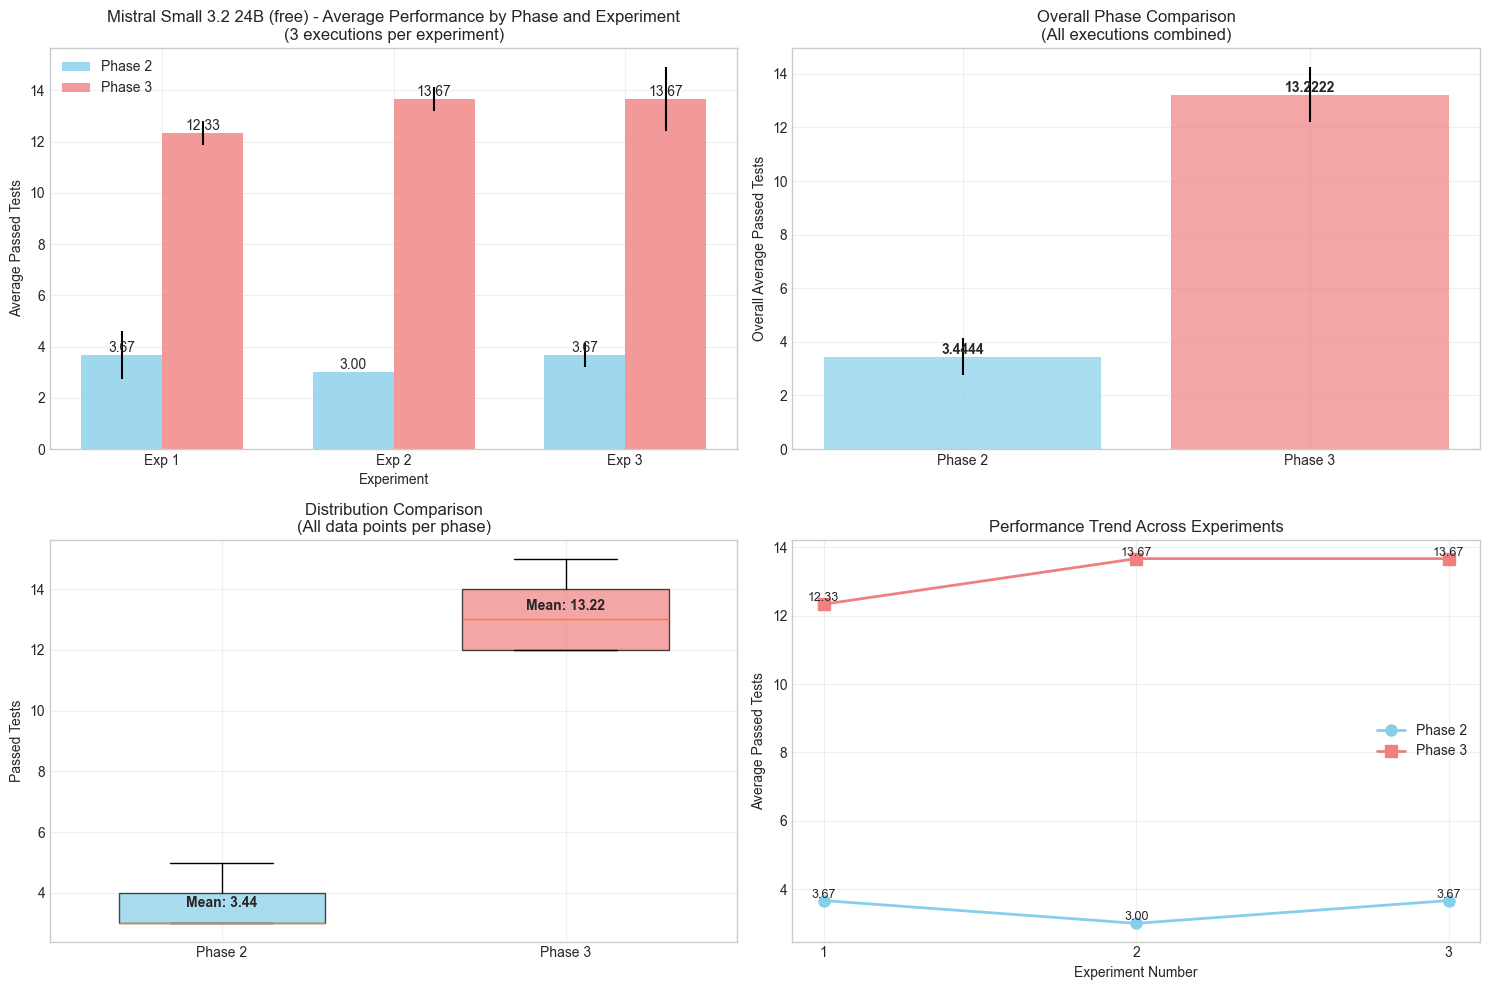


DETAILED STATISTICAL ANALYSIS

PHASE1 RESULTS:
--------------------------------------------------
Overall: 3.4444 ± 0.6849 (range: 3-5, n: 9)
  experiment1: [5, 3, 3] -> 3.6667 ± 0.9428
  experiment2: [3, 3, 3] -> 3.0000 ± 0.0000
  experiment3: [4, 3, 4] -> 3.6667 ± 0.4714

PHASE2 RESULTS:
--------------------------------------------------
Overall: 13.2222 ± 1.0304 (range: 12-15, n: 9)
  experiment1: [13, 12, 12] -> 12.3333 ± 0.4714
  experiment2: [14, 13, 14] -> 13.6667 ± 0.4714
  experiment3: [12, 14, 15] -> 13.6667 ± 1.2472

PERFORMANCE CONCLUSION
Phase 2 Overall Average: 3.4444 ± 0.6849
Phase 3 Overall Average: 13.2222 ± 1.0304
Difference: -9.7778

🎯 BEST PERFORMING PHASE: PHASE 3
📈 Performance Improvement: 283.9%
💡 RECOMMENDATION: Use Phase 3 configuration

EXECUTIVE SUMMARY
Experimental design: 2 phases × 3 experiments × 3 executions
Files successfully processed: 18/18
Phase 2 performance: 3.4444 ± 0.6849
Phase 3 performance: 13.2222 ± 1.0304
Performance difference: -9.7778
Reco

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os

# Configuración de plot
plt.style.use('seaborn-v0_8-whitegrid')
model_name = "Mistral Small 3.2 24B (free)"

# =============================================
# CONFIGURACIÓN 
# =============================================

file_paths = {
    'phase1': {
        'experiment1': [
            "../trial-01/exp-01/phase2/eval/elsevier_ttls_results.json",  
            "../trial-02/exp-01/phase2/eval/elsevier_ttls_results.json",  
            "../trial-03/exp-01/phase2/eval/elsevier_ttls_results.json"   
        ],
        'experiment2': [
            "../trial-01/exp-02/phase2/eval/elsevier_ttls_results.json",  
            "../trial-02/exp-02/phase2/eval/elsevier_ttls_results.json",  
            "../trial-03/exp-02/phase2/eval/elsevier_ttls_results.json"   
        ],
        'experiment3': [
            "../trial-01/exp-03/phase2/eval/elsevier_ttls_results.json",  
            "../trial-02/exp-03/phase2/eval/elsevier_ttls_results.json",  
            "../trial-03/exp-03/phase2/eval/elsevier_ttls_results.json"   
        ]
    },
    'phase2': {
        'experiment1': [
            "../trial-01/exp-01/phase3/eval/elsevier_ttls_results.json",  
            "../trial-02/exp-01/phase3/eval/elsevier_ttls_results.json",  
            "../trial-03/exp-01/phase3/eval/elsevier_ttls_results.json"   
        ],
        'experiment2': [
            "../trial-01/exp-02/phase3/eval/elsevier_ttls_results.json",  
            "../trial-02/exp-02/phase3/eval/elsevier_ttls_results.json",  
            "../trial-03/exp-02/phase3/eval/elsevier_ttls_results.json"   
        ],
        'experiment3': [
            "../trial-01/exp-03/phase3/eval/elsevier_ttls_results.json",  
            "../trial-02/exp-03/phase3/eval/elsevier_ttls_results.json",  
            "../trial-03/exp-03/phase3/eval/elsevier_ttls_results.json"   
        ]
    }
}

# =============================================
# ESTRUCTURA DE DATOS
# =============================================

# Inicializar estructura para almacenar resultados
data_structure = {
    'phase1': {
        'experiment1': [0, 0, 0],
        'experiment2': [0, 0, 0], 
        'experiment3': [0, 0, 0]
    },
    'phase2': {
        'experiment1': [0, 0, 0],
        'experiment2': [0, 0, 0],
        'experiment3': [0, 0, 0]
    }
}

print("Processing 18 files from individual paths...")
print("=" * 60)

# Procesar cada archivo según su ruta específica
for phase in file_paths:
    for experiment in file_paths[phase]:
        for run_idx, file_path in enumerate(file_paths[phase][experiment]):
            try:
                # Verificar si el archivo existe
                if not os.path.exists(file_path):
                    print(f"Warning: File not found: {file_path}")
                    continue
                
                # Leer y procesar archivo JSON
                with open(file_path, 'r') as f:
                    data = json.load(f)
                
                # Contar passed: true
                if isinstance(data, list):
                    # Si es una lista, buscar en cada elemento
                    passed_count = sum(1 for item in data if item.get('passed') == True)
                elif isinstance(data, dict):
                    # Si es un diccionario, buscar recursivamente
                    def count_passed(obj):
                        count = 0
                        if isinstance(obj, dict):
                            if obj.get('passed') == True:
                                count += 1
                            # Buscar recursivamente en todos los valores del diccionario
                            for value in obj.values():
                                count += count_passed(value)
                        elif isinstance(obj, list):
                            for item in obj:
                                count += count_passed(item)
                        return count
                    
                    passed_count = count_passed(data)
                else:
                    passed_count = 0
                    print(f"Warning: Unexpected data format in {file_path}")
                
                data_structure[phase][experiment][run_idx] = passed_count
                print(f"Processed: {os.path.basename(file_path)} -> {phase}/{experiment}/run{run_idx+1}: {passed_count} passed")
                
            except Exception as e:
                print(f"Error processing {file_path}: {str(e)}")

# =============================================
# VERIFICACIÓN DE DATOS
# =============================================

print("\n" + "="*60)
print("DATA VERIFICATION")
print("="*60)

total_files = 0
for phase in data_structure:
    for experiment in data_structure[phase]:
        valid_runs = sum(1 for x in data_structure[phase][experiment] if x != 0)
        total_files += valid_runs
        print(f"{phase}/{experiment}: {data_structure[phase][experiment]} ({valid_runs}/3 runs)")

print(f"\nTotal files successfully processed: {total_files}/18")

# =============================================
# CÁLCULO DE ESTADÍSTICAS
# =============================================

phases = ['phase1', 'phase2']
experiments = ['experiment1', 'experiment2', 'experiment3']

# Convertir a arrays numpy para análisis
phase1_data = np.array([data_structure['phase1'][exp] for exp in experiments])
phase2_data = np.array([data_structure['phase2'][exp] for exp in experiments])

# Calcular promedios
phase1_means = np.mean(phase1_data, axis=1)
phase2_means = np.mean(phase2_data, axis=1)

overall_phase1_mean = np.mean(phase1_data)
overall_phase2_mean = np.mean(phase2_data)

# =============================================
# GRÁFICAS
# =============================================

# Crear figura con múltiples subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Gráfica 1: Comparación detallada por experimento
ax1 = axes[0]
x = np.arange(len(experiments))
width = 0.35

bars1 = ax1.bar(x - width/2, phase1_means, width, label='Phase 2', 
                alpha=0.8, color='skyblue', yerr=np.std(phase1_data, axis=1))
bars2 = ax1.bar(x + width/2, phase2_means, width, label='Phase 3', 
                alpha=0.8, color='lightcoral', yerr=np.std(phase2_data, axis=1))

ax1.set_xlabel('Experiment')
ax1.set_ylabel('Average Passed Tests')
ax1.set_title(f'{model_name} - Average Performance by Phase and Experiment\n(3 executions per experiment)')
ax1.set_xticks(x)
ax1.set_xticklabels(['Exp 1', 'Exp 2', 'Exp 3'])
ax1.legend()
ax1.grid(True, alpha=0.3)

# Añadir valores en las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom')

# Gráfica 2: Comparación general
ax2 = axes[1]
overall_means = [overall_phase1_mean, overall_phase2_mean]
bars = ax2.bar(['Phase 2', 'Phase 3'], overall_means, 
               alpha=0.7, color=['skyblue', 'lightcoral'],
               yerr=[np.std(phase1_data), np.std(phase2_data)])
ax2.set_ylabel('Overall Average Passed Tests')
ax2.set_title('Overall Phase Comparison\n(All executions combined)')
ax2.grid(True, alpha=0.3)

for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

# Gráfica 3: Box plot comparativo
ax3 = axes[2]
box_data = [phase1_data.flatten(), phase2_data.flatten()]
box_plot = ax3.boxplot(box_data, labels=['Phase 2', 'Phase 3'], 
                       patch_artist=True, widths=0.6)

colors = ['skyblue', 'lightcoral']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax3.set_ylabel('Passed Tests')
ax3.set_title('Distribution Comparison\n(All data points per phase)')
ax3.grid(True, alpha=0.3)

# Añadir promedios en el box plot
phase1_mean = np.mean(phase1_data)
phase2_mean = np.mean(phase2_data)
ax3.text(1, phase1_mean, f'Mean: {phase1_mean:.2f}', 
         ha='center', va='bottom', fontweight='bold')
ax3.text(2, phase2_mean, f'Mean: {phase2_mean:.2f}', 
         ha='center', va='bottom', fontweight='bold')

# Gráfica 4: Línea de tendencia por experimento
ax4 = axes[3]
x_exp = np.arange(1, 4)  # Experimentos 1, 2, 3

ax4.plot(x_exp, phase1_means, 'o-', label='Phase 2', color='skyblue', linewidth=2, markersize=8)
ax4.plot(x_exp, phase2_means, 's-', label='Phase 3', color='lightcoral', linewidth=2, markersize=8)

ax4.set_xlabel('Experiment Number')
ax4.set_ylabel('Average Passed Tests')
ax4.set_title('Performance Trend Across Experiments')
ax4.set_xticks(x_exp)
ax4.set_xticklabels(['1', '2', '3'])
ax4.legend()
ax4.grid(True, alpha=0.3)

# Añadir valores en los puntos
for i, (y1, y2) in enumerate(zip(phase1_means, phase2_means)):
    ax4.text(i+1, y1, f'{y1:.2f}', ha='center', va='bottom', fontsize=9)
    ax4.text(i+1, y2, f'{y2:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('phase_comparison_detailed.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================
# ANÁLISIS ESTADÍSTICO DETALLADO
# =============================================

print("\n" + "="*70)
print("DETAILED STATISTICAL ANALYSIS")
print("="*70)

# Calcular estadísticas por fase
phase_stats = {}
for phase in phases:
    all_data = []
    for exp in experiments:
        all_data.extend(data_structure[phase][exp])
    
    phase_stats[phase] = {
        'mean': np.mean(all_data),
        'std': np.std(all_data),
        'min': np.min(all_data),
        'max': np.max(all_data),
        'total_runs': len([x for x in all_data if x != 0])
    }

# Mostrar resultados detallados
for phase in phases:
    print(f"\n{phase.upper()} RESULTS:")
    print("-" * 50)
    stats = phase_stats[phase]
    print(f"Overall: {stats['mean']:.4f} ± {stats['std']:.4f} "
          f"(range: {stats['min']}-{stats['max']}, n: {stats['total_runs']})")
    
    for exp in experiments:
        runs = data_structure[phase][exp]
        if any(runs):  # Si hay al menos un dato no cero
            exp_mean = np.mean(runs)
            exp_std = np.std(runs)
            print(f"  {exp}: {runs} -> {exp_mean:.4f} ± {exp_std:.4f}")

# =============================================
# CONCLUSIÓN Y RECOMENDACIÓN
# =============================================

print("\n" + "="*70)
print("PERFORMANCE CONCLUSION")
print("="*70)

phase1_mean = phase_stats['phase1']['mean']
phase2_mean = phase_stats['phase2']['mean']
difference = phase1_mean - phase2_mean
abs_difference = abs(difference)

print(f"Phase 2 Overall Average: {phase1_mean:.4f} ± {phase_stats['phase1']['std']:.4f}")
print(f"Phase 3 Overall Average: {phase2_mean:.4f} ± {phase_stats['phase2']['std']:.4f}")
print(f"Difference: {difference:+.4f}")

# Determinar la mejor fase
if abs_difference > 0.05:  # Umbral para diferencia significativa
    if difference > 0:
        better_phase = "PHASE 2"
        improvement = (difference / phase2_mean) * 100
    else:
        better_phase = "PHASE 3" 
        improvement = (abs_difference / phase1_mean) * 100
    
    print(f"\n🎯 BEST PERFORMING PHASE: {better_phase}")
    print(f"📈 Performance Improvement: {improvement:.1f}%")
    
    if better_phase == "PHASE 2":
        print("💡 RECOMMENDATION: Use Phase 2 configuration")
    else:
        print("💡 RECOMMENDATION: Use Phase 3 configuration")
else:
    print(f"\n📊 RESULT: Both phases show similar performance")
    print("💡 RECOMMENDATION: Consider other factors like cost or complexity")

print("="*70)

# =============================================
# RESUMEN EJECUTIVO
# =============================================

print("\n" + "="*70)
print("EXECUTIVE SUMMARY")
print("="*70)
print(f"Experimental design: 2 phases × 3 experiments × 3 executions")
print(f"Files successfully processed: {total_files}/18")
print(f"Phase 2 performance: {phase1_mean:.4f} ± {phase_stats['phase1']['std']:.4f}")
print(f"Phase 3 performance: {phase2_mean:.4f} ± {phase_stats['phase2']['std']:.4f}")
print(f"Performance difference: {difference:+.4f}")
if abs_difference > 0.05:
    print(f"Recommended phase: {better_phase}")
else:
    print("Recommended phase: Similar performance - consider other factors")
print("="*70)